# TP1: Régression Linéaire simple
 

La régression linéaire simple est un algorithme prédictif supervisé. Il prend en entrée une variable prédictive x et va essayer de trouver une fonction de prédiction  $h_\theta(x)$ étant une droite, elle s’écrira mathématiquement sous la forme :
$$ h_\theta(x)=\theta_0+\theta_1 x$$
 Avec $ \theta_0$ et $ \theta_1$ sont les coefficients de la droite.

Le but  revient à trouver un couple $(\theta_0,\theta_1)$ optimal tel que $h_\theta(x)$ soit le plus proche possible de $y$ (la valeur qu’on essaie de prédire). Et ce, pour tous les couples $(x,y)$ qui forment notre ensemble de données d’apprentissage $ \{ (x_{i},y_{i}) \in R^{2}, i=1...n \}$.
 La fonction $h_\theta$ va essayer de transformer au mieux  $x_i$ en $y_i$ tel que  $$ h_\theta(x_i)\approx y_i  \forall i \in \{1 ... n\}$$
 <img src="courbe.jpeg" style="with:100px;height:200px"/>

## A- Methode1:Moindres carrés

Dans le cas d'une régression lineaire simple nous avons la solution directe suivante:
$$\theta_{1}=\frac{\sum_{i=0}^{m}x_{i}y_{i}-m\overline{x}\overline{y}}{\sum_{i=0}^{m}x_{i}^2-m\overline{x}^2} $$

$$\theta_{0}=\overline{y}-w_{1}\overline{x}$$

Où $\overline{x}$ est la moyenne des éléments de x et $\overline{y}$ est la moyenne des éléments de y

## Question1
-L'étude d'un marché présente des quantités offertes (X) et des prix d'achat (Y) (en dhs)  a donné les résultats suivants;	
 <img src="table.jpeg" style="with:30px;height:60px"/>
 a-En utilisant numpy afficher X et Y

In [1]:
# import librariries
import numpy as np

x=np.array([2,4,14,8,12])
y=np.array([10,8,2,6,4])
print(x,"\t",y)

[ 2  4 14  8 12] 	 [10  8  2  6  4]


b-Ecrire un script qui calcule les valeur de $\theta_{0}$, $\theta_{1}$ 

In [2]:
from math import pow
def cov(x,y):
        multi=0
        for i in range(len(x)):d
            multi+=(x[i]*y[i])- ( (np.mean(x))*(np.mean(y)) )
        return (1/len(x))*multi
    

deta1=cov(x,y)/np.var(x)
deta0=np.mean(y)-deta1*np.mean(x)
print(deta1,deta0)

-0.6153846153846154 10.923076923076923


c-Déterminer la fonction de prédiction $ h_\theta(x)=\theta_0+\theta_1 x$

In [3]:
def h(x):
    if isinstance(x,list):
        list_predict=[]
        for i in x:
            list_predict.append((deta1*i)+deta0)
    else:
        return (deta1*x)+deta0

  d-Quelle prix d'achat peut-on prévoir avec un prix d'achat de x=10

In [4]:
print(h(10))

4.769230769230769


e-visualiser les résultats 

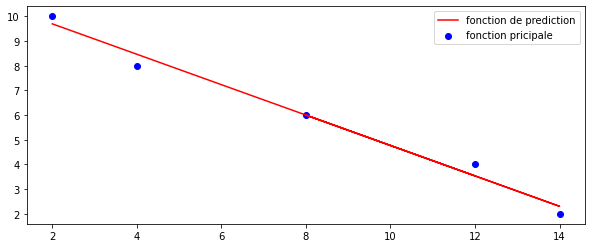

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.scatter(x,y,c="blue",label="fonction pricipale")
plt.plot(x,h(x),label="fonction de prediction",c="red")
plt.legend()
plt.show()

f-Déterminer le coefficient de determination $R^2=1-\frac{\sum_{i=0}^{m}(y_{i}-h_\theta(x_{i}))}{\sum_{i=0}^{m}(y_{i}-\overline{y})^2}$ et le coefficient de coerrélation $R=\frac{cov(X,Y)}{\sigma(x)\sigma(y)}=\frac{\sum_{i=0}^{m}x_{i}y_{i}-m\overline{x}\overline{y}}{\sqrt{\sum_{i=0}^{m} (x_{i}^2-m\overline{x}^2 ) (\sum_{i=0}^{m}x_{i}^2-m\overline{x}^2)}}$

In [6]:
from math import sqrt,pow
R=lambda x,y :cov(x,y)/(sqrt(np.var(x))*sqrt(np.var(y)))

print(R(x,y))

-0.9922778767136676


In [7]:
print(R(x,y)**2)

0.9846153846153846


$R$ est proche de -1, donc on a une corrélation négative assez forte entre $X$ et $Y$.   ( si le prix augmente la quantité diminue).
Graphiquement, le nuage de points est sous forme d'une courbe décroissante linéaire ce qui confirme la liaison assez forte négativement.


## B-Utilisation de la méthode linregress

On peut utiliser le module librairie SciPy (Scientific Python) pour implémenter une régression linéaire. Le sous package stats propose la fonction linregress qui calcul une régression à partir d'un jeu de donnée d'entrainement

1-Ecrire un script Ecrire un script qui calcule les valeur de $\theta_{0}$, $\theta_{1}$ en utilisant linregress et les données X et Y de la question précédente

In [8]:
import scipy.stats as sc
res = sc.linregress(x, y)
deta0=res.intercept
deta1=res.slope
print(deta0,deta1)

10.923076923076923 -0.6153846153846154


2- En utilisant la méthode linregress, calculer les valeur de $\theta_{0}$, $\theta_{1}$ pour les données du fichier "linear_regression_dataset.csv" (utiliser pondas pour afficher les données)

In [9]:
import pandas as pd

data=pd.read_csv("univariate_linear_regression_dataset.csv")
x1=data.iloc[:,0].values
y1=data.iloc[:,1].values

new_res=sc.linregress(x1, y1)
new_deta0=new_res.intercept
new_deta1=new_res.slope
print(new_deta0,new_deta1)

-3.8957808783118555 1.1930336441895941


#### Prédiction d'une nouvelle observation
 Utilisons la fonction de prédiction pour trouver une estimation de  $h_\theta(x=22.5)$

In [10]:
new_h=lambda x: new_deta0+(new_deta1*x)
print(new_h(22.5))

22.94747611595401


# C-Méthode de la descente

 Pour minimiser le coût $$ J(\theta_{0},\theta_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} = \frac{1}{2m}\sum_{i=0}^{m}(\theta_{0}+ \theta_{1}x_{i}-y_{i})^{2} $$
On utilise la methode de la descente du gradient. Il faut donc calculer la dérivée de $J(\theta_{0},\theta_{1})$ par rapport à $\theta_{0}$ et par rapport à $\theta_{1}$ nous avons alors:
$$ \frac{\delta J(\theta_{0},\theta_{1})}{\delta \theta_{0}}=\frac{1}{m}\sum_{i=0}^{m}(\theta_{0}+ \theta_{1}x_{i}-y_{i}) $$

$$ \frac{\delta J(\theta_{0},\theta_{1})}{\delta \theta_{1}}=\frac{1}{m}\sum_{i=0}^{m}(\theta_{0}+ \theta_{1}x_{i}-y_{i})x_{i} $$
La mise à jour des coeficients sera comme suivant:
$$ \theta_{0}\leftarrow \theta_{0}- \alpha\frac{\delta J(\theta_{0},\theta_{1})}{\delta \theta_{0}}$$
$$ \theta_{1}\leftarrow \theta_{1}- \alpha\frac{\delta J(\theta_{0},\theta_{1})}{\delta \theta_{1}}$$

$\alpha$: learning rate

L'algorithme sous forme matricielle est le suivant

 <img src="matrice.jpeg" style="with:140px;height:260px"/>

## 1-Datasets
1-Générer de données aléatoires avec une tendance linéaire avec make_regression: on a un dataset  qui contient 100 exemples, et une seule variable . Note: chaque fois que la cellule est executée, des données différentes sont générer. Utiliser np.random.seed(0) pour reproduire le meme Dataset a chaque fois.

In [67]:
# from sklearn.datasets import make_regression

# x,y=make_regression(n_samples=100,n_features=1)
# np.random.seed(0)
# x,y=np.array(x),np.array(y)

from sklearn.datasets import make_regression
np.random.seed(0)
x_data,y_data = make_regression(n_samples=100, n_features=1,noise=10)

Important: vérifier les dimensions de x et y. On remarque que y n'a pas les dimensions (100, 1). On corrige le probleme avec np.reshape

In [68]:
x_shape=np.array(x_data).shape
y_shape=np.array(y_data).shape
print("shape of: \nx:{} \ny:{}".format(x_shape,y_shape))
x=np.reshape(x_data,(100,1))
y=np.reshape(y_data,(100,1))
print("The new shape of: \nx:{} \ny:{}".format(x.shape,y.shape))

shape of: 
x:(100, 1) 
y:(100,)
The new shape of: 
x:(100, 1) 
y:(100, 1)


2-Créez la matrice X. 




In [69]:
X=np.array([[x_data[i][0] , 1] for i in range(len(x_data))])

3-Créez le vecteur $\theta$ (initialisé avec des coefficients aléatoires).

In [70]:
import random
deta=np.array([random.randint(9,10),random.randint(8,10)])
deta=np.reshape(deta,(2,1))
deta

array([[10],
       [10]])

# 2- Modele Linéaire de prédiction 
Implémenter le modèle de prédiction $ H_\theta=X.\theta$

In [71]:
def lineaire_prediction(x,deta):
    return x.dot(deta)

In [72]:
lineaire_prediction(X,deta)

array([[  6.40446838],
       [ 19.76639036],
       [ 14.02341641],
       [  1.86853718],
       [  1.12214252],
       [ 14.43863233],
       [  0.2272212 ],
       [ 14.28331871],
       [ 12.08274978],
       [  6.88447468],
       [  4.89194862],
       [ 11.26912093],
       [ -5.36243686],
       [  5.98219064],
       [ 16.53618595],
       [ 21.78779571],
       [  8.20075164],
       [ 27.85870494],
       [ 24.54273507],
       [  3.15189909],
       [ 19.78737984],
       [ 28.95889176],
       [  5.61925698],
       [ 13.13067702],
       [ 17.61037725],
       [ 17.77490356],
       [ 29.50775395],
       [ 13.33674327],
       [  6.52087851],
       [ 25.32779214],
       [  1.04533439],
       [  4.21150335],
       [ -0.48552965],
       [ 13.7816252 ],
       [ 10.10500021],
       [ 14.62782256],
       [ 11.44043571],
       [  5.96823053],
       [ 10.51945396],
       [ -2.5279536 ],
       [ 20.54451727],
       [ 14.00157208],
       [ -7.06270191],
       [ 32

# 3- Fonction Cout 
Ecrire un script qui définit la fonction cout $$ J(\theta)=\frac{1}{2m}\sum(X.\theta-Y)^{2}$$

In [73]:
def cost_function(x,o,y):
    return (sum(x.dot(o)-y)**2)*(1/(2*len(x)))

cost_function(X,deta,y)

array([3927.88522943])

# 4- Gradients et Descente de Gradient 
1-Ecrire un script qui définit la fonction du gradiant $$ \frac{\delta J(\theta)}{\delta \theta}=\frac{1}{m}X^T.(X.\theta-y)$$
 

In [79]:
grade_function=lambda x,o,y: np.dot(np.transpose(x),lineaire_prediction(x,o)-y)*(1 / len(x))

grade_function(X,deta,y)

array([[-32.6055905 ],
       [  8.86327843]])

2-Implementer la descente de gradient en utilisant de gradiant:
$$ \theta\leftarrow \theta- \alpha\frac{\delta J(\theta)}{\delta \theta}$$

In [75]:
def descendent(o,alpha,x,y):
    return o-(grade_function(x,o,y)*alpha)

# 5-Calcul des parametres $\theta_1$ et  $\theta_0$
  1-On définit un nombre d'itérations de $1000$ , ainsi $\alpha=0.01$,calculer $\theta_1$ et  $\theta_0$
 
 

In [128]:
iteration=1000
new_deta_value=deta
for i in range(iteration):
    new_deta_value=descendent(new_deta_value,0.01,X,y)
        
def iter(iteration):
    cost_value=[]
    new_deta_cost=deta
    for i in range(iteration):
        new_deta_cost=descendent(new_deta_cost,0.01,X,y)
        cost_value.append(cost_function(X,new_deta_cost,y))
        print(cost_value)
    return new_deta_cost,cost_value
new_deta_value

array([[42.61776821],
       [-0.81281242]])

2-Créer d'un vecteur prédictions qui contient les prédictions de notre modele final

In [111]:
new_y_predect = lineaire_prediction(X,new_deta_value)

3-Afficher les résultats de prédictions par rapport a notre Dataset

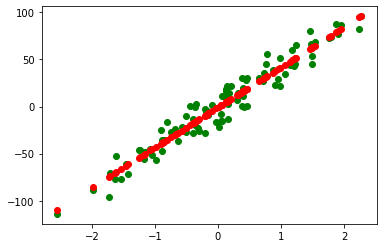

In [112]:
plt.scatter(X[:,0] , y , c='green')
plt.scatter(X[:,0] , new_y_predect , c='red')

 # 5. Courbes d'apprentissage
 vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

In [125]:
nbr_iter=100
# plt.plot(range(nbr_iter),iter(0.01),c="blue")
# plt.plot(range(nbr_iter),iter(0.5),c="blue")
# plt.plot(range(nbr_iter),iter(2),c="red")

# 7-Evaluation finale
Utiliser le coefficient de détermination pour évaluer la réelle performance. 

In [131]:
print(R(X,new_y_predect)**2)

[1.34158776e+00 4.95264688e-04]


Plus le résultat est proche de 1, meilleur est votre modele

In [ ]:
coeff_det